## Graphs

In [1]:
import networkx as nx
G1 = nx.read_edgelist("karate.edgelist", nodetype=int)

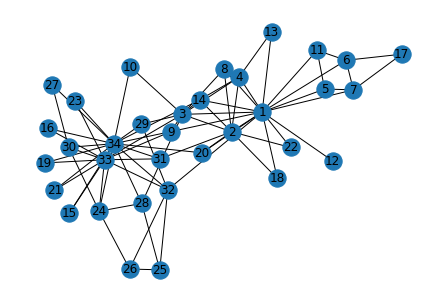

In [2]:
import networkx as nx

# Draw the graph
nx.draw(G1, with_labels=True)


In [3]:
num_nodes1 = G1.number_of_nodes()
num_edges1 = G1.number_of_edges()
print(num_nodes1,num_edges1 )

34 77


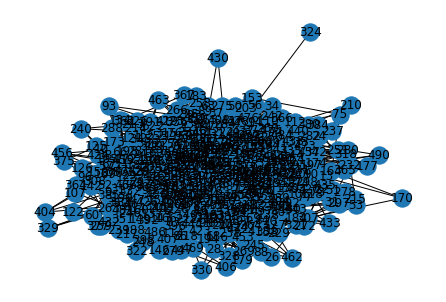

In [4]:
from networkx.generators.random_graphs import erdos_renyi_graph


n = 500
p = 0.019
G2 = erdos_renyi_graph(n, p)

nx.draw(G2, with_labels=True)


In [5]:
num_nodes2 = G2.number_of_nodes()
num_edges2 = G2.number_of_edges()
print(num_nodes2,num_edges2 )

500 2414


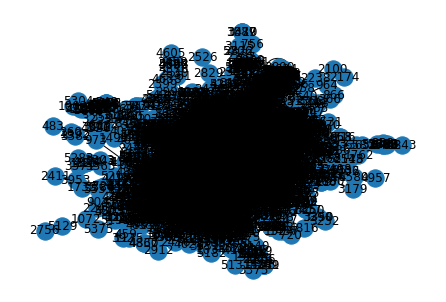

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the edges CSV file into a pandas dataframe
df = pd.read_csv('politician_edges.csv')

# Create a graph from the dataframe
G3 = nx.from_pandas_edgelist(df, 'node_1', 'node_2')

# Draw the graph
nx.draw(G3, with_labels=True)
plt.show()


In [7]:
num_nodes3 = G3.number_of_nodes()
num_edges3 = G3.number_of_edges()
print(num_nodes3,num_edges3 )

5908 41729


# Greedy

In [8]:
import networkx as nx
import random

def greedy_influence_maximization(G, k):
    """
    Greedy algorithm for influence maximization on a graph G.

    Args:
        G: a networkx graph object.
        k: the number of nodes to select.

    Returns:
        A list of k nodes that maximizes the spread of influence.
    """

    S = [] # Selected nodes
    for i in range(k):
        max_node = None
        max_influence = -1
        for node in G.nodes():
            if node not in S:
                influence = get_influence(G, S + [node])
                if influence > max_influence:
                    max_node = node
                    max_influence = influence
        S.append(max_node)
    return S

def get_influence(G, S):
    """
    Compute the spread of influence on a graph G starting from a set of seed nodes S.

    Args:
        G: a networkx graph object.
        S: a list of seed nodes.

    Returns:
        The number of nodes influenced by S.
    """

    H = nx.Graph(G) # Copy the original graph
    for node in S:
        H.nodes[node]['activated'] = True # Activate the seed nodes

    activated_nodes = set(S)
    while True:
        activated_nodes_old = set(activated_nodes)
        for node in activated_nodes_old:
            for neighbor in H.neighbors(node):
                if not H.nodes[neighbor].get('activated', False):
                    # Check if the neighbor is influenced
                    num_activated_neighbors = sum(1 for n in H.neighbors(neighbor) if H.nodes[n].get('activated', False))
                    if random.random() < 1 - (1 - H[node][neighbor]['weight']) ** num_activated_neighbors:
                        H.nodes[neighbor]['activated'] = True
                        activated_nodes.add(neighbor)
        if activated_nodes == activated_nodes_old:
            break
    return len(activated_nodes)


## Graph1

In [9]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G1.edges():
    G1[u][v]['weight'] = 1

# Run the greedy algorithm
k = 5
S1_G = greedy_influence_maximization(G1, k)

# Print the selected nodes
print(S1_G)


[1, 32, 22, 20, 18]
Wall time: 100 ms


## Graph2

In [10]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G2.edges():
    G2[u][v]['weight'] = 1

# Run the greedy algorithm
k = 10
S2_G = greedy_influence_maximization(G2, k)

# Print the selected nodes
print(S2_G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Wall time: 1min 30s


## Graph3

In [ ]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = 1

# Run the greedy algorithm
k = 15
S3_G = greedy_influence_maximization(G3, k)

# Print the selected nodes
print(S3_G)

# CELF 

In [11]:
import networkx as nx
import heapq

def celf_influence_maximization(G, k):
    """
    CELF algorithm for influence maximization on a graph G.

    Args:
        G: a networkx graph object.
        k: the number of nodes to select.

    Returns:
        A list of k nodes that maximizes the spread of influence.
    """
    
    S = [] # Selected nodes
    pq = [] # Priority queue of candidate nodes
    
    # Compute the marginal gain of each node
    for node in G.nodes():
        mg = get_marginal_gain(G, S, node)
        heapq.heappush(pq, (-mg, node))
        
    # Select the top k nodes with highest marginal gain
    while len(S) < k:
        _, node = heapq.heappop(pq)
        S.append(node)
        # Update the priority queue with the new marginal gains
        for neighbor in G.neighbors(node):
            if neighbor not in S:
                mg = get_marginal_gain(G, S, neighbor)
                heapq.heappush(pq, (-mg, neighbor))
                
    return S

def get_marginal_gain(G, S, node):
    """
    Compute the marginal gain of a node given a set of seed nodes S.

    Args:
        G: a networkx graph object.
        S: a list of seed nodes.
        node: the node to evaluate.

    Returns:
        The marginal gain of the node.
    """
    
    if node in S:
        return 0
    
    H = nx.Graph(G) # Copy the original graph
    for n in S:
        H.remove_node(n) # Remove the seed nodes
    
    # Compute the influence spread of the node
    activated_nodes = set([node])
    while True:
        activated_nodes_prev = activated_nodes.copy()
        for n in activated_nodes_prev:
            for m in H.neighbors(n):
                if m not in activated_nodes:
                    if random.random() < H[n][m]['weight']:
                        activated_nodes.add(m)
        if activated_nodes == activated_nodes_prev:
            break
    influence = len(activated_nodes)
    
    # Compute the marginal gain
    return influence - len(S)


## Graph1

In [12]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G1.edges():
    G1[u][v]['weight'] = 1

# Run the CELF algorithm
k = 5
S1_c = celf_influence_maximization(G1, k)

# Print the selected nodes
print(S1_c)

[1, 2, 3, 4, 5]
Wall time: 21 ms


## Graph2

In [13]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G2.edges():
    G2[u][v]['weight'] = 1

# Run the CELF algorithm
k = 10
S2_c = celf_influence_maximization(G2, k)

# Print the selected nodes
print(S2_c)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Wall time: 4.91 s


## Graph3

In [30]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = 1

# Run the CELF algorithm
k = 10
S3_c = celf_influence_maximization(G3, k)

# Print the selected nodes
print(S3_c)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Wall time: 20min 49s


# CELF++

In [14]:
import networkx as nx
from queue import PriorityQueue

def celfpp_influence_maximization(G, k):
    """
    CELF++ algorithm for influence maximization on a graph G.

    Args:
        G: a networkx graph object.
        k: the number of nodes to select.

    Returns:
        A list of k nodes that maximizes the spread of influence.
    """
    
    S = [] # Selected nodes
    pq = PriorityQueue() # Priority queue of candidate nodes
    
    # Compute the marginal gain of each node
    for node in G.nodes():
        mg = get_marginal_gain(G, S, node)
        pq.put((-mg, node))
        
    # Select the top k nodes with highest marginal gain
    while len(S) < k:
        while True:
            _, node = pq.get()
            if node not in S:
                S.append(node)
                break
        # Update the priority queue with the new marginal gains
        for neighbor in G.neighbors(node):
            if neighbor not in S:
                new_mg = get_marginal_gain(G, S, neighbor)
                if new_mg > 0:
                    old_mg = -pq.queue[-1][0] if pq.qsize() == k else 0
                    if new_mg > old_mg:
                        pq.put((-new_mg, neighbor))
                        if pq.qsize() > k:
                            pq.get()
                
    return S
def get_marginal_gain(G, S, node):
    """
    Compute the marginal gain of a node given a set of seed nodes S.

    Args:
        G: a networkx graph object.
        S: a list of seed nodes.
        node: the node to evaluate.

    Returns:
        The marginal gain of the node.
    """
    
    if node in S:
        return 0
    
    H = nx.Graph(G) # Copy the original graph
    for n in S:
        H.remove_node(n) # Remove the seed nodes
    
    # Compute the influence spread of the node
    activated_nodes = set([node])
    while True:
        activated_nodes_prev = activated_nodes.copy()
        for n in activated_nodes_prev:
            for m in H.neighbors(n):
                if m not in activated_nodes:
                    if random.random() < H[n][m]['weight']:
                        activated_nodes.add(m)
        if activated_nodes == activated_nodes_prev:
            break
    influence = len(activated_nodes)
    
    # Compute the marginal gain
    return influence - len(S)


## Graph1

In [15]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G1.edges():
    G1[u][v]['weight'] = 1

# Run the CELF++ algorithm
k = 5
S1_cpp = celfpp_influence_maximization(G1, k)

# Print the selected nodes
print(S1_cpp)

[1, 17, 20, 23, 26]
Wall time: 19 ms


## Graph2

In [16]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G2.edges():
    G2[u][v]['weight'] = 1

# Run the CELF++ algorithm
k = 10
S2_cpp = celfpp_influence_maximization(G2, k)

# Print the selected nodes
print(S2_cpp)

[0, 12, 21, 33, 44, 60, 68, 77, 86, 94]
Wall time: 4.93 s


## Graph3

In [32]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = 1

# Run the CELF++ algorithm
k = 15
S3_cpp = celfpp_influence_maximization(G3, k)

# Print the selected nodes
print(S3_cpp)

[0, 45, 50, 54, 57, 88, 117, 119, 124, 128, 141, 144, 146, 150, 164]
Wall time: 20min 14s


# CELFIE

In [17]:
import networkx as nx
import heapq

def celfie_influence_maximization(G, k, alpha=0.1):
    """
    CELFIE algorithm for influence maximization on a graph G.

    Args:
        G: a networkx graph object.
        k: the number of nodes to select.
        alpha: the scaling factor for the influence estimation.

    Returns:
        A list of k nodes that maximizes the spread of influence.
    """
    
    S = [] # Selected nodes
    pq = [] # Priority queue of candidate nodes
    
    # Compute the marginal gain and influence estimate of each node
    for node in G.nodes():
        mg, ie = get_marginal_gain_and_influence_estimate(G, S, node, alpha)
        heapq.heappush(pq, (-mg, node, ie))
        
    # Select the top k nodes with highest marginal gain
    while len(S) < k:
        _, node, ie = heapq.heappop(pq)
        S.append(node)
        # Update the priority queue with the new marginal gains and influence estimates
        for neighbor in G.neighbors(node):
            if neighbor not in S:
                mg, ie = get_marginal_gain_and_influence_estimate(G, S, neighbor, alpha)
                heapq.heappush(pq, (-mg, neighbor, ie))
                
    return S

def get_marginal_gain_and_influence_estimate(G, S, node, alpha):
    """
    Compute the marginal gain and influence estimate of adding a node to a set of seed nodes.

    Args:
        G: a networkx graph object.
        S: a list of seed nodes.
        node: the node to evaluate.
        alpha: the scaling factor for the influence estimation.

    Returns:
        A tuple containing the marginal gain and influence estimate of adding the node to the seed nodes.
    """
    
    if node in S:
        return 0, 0
    
    H = nx.Graph(G) # Copy the original graph
    for n in S:
        H.nodes[n]['activated'] = True # Activate the seed nodes
    
    # Compute the initial number of activated nodes
    activated_nodes = set(S)
    for n in nx.descendants(H, node):
        if not H.nodes[n].get('activated', False):
            num_activated_neighbors = sum(1 for m in H.neighbors(n) if H.nodes[m].get('activated', False))
            for m in H.neighbors(n):
              if random.random() < (H[n][m]['weight'] ** num_activated_neighbors) ** alpha:
                H.nodes[n]['activated'] = True
                activated_nodes.add(n)
    initial_influence = len(activated_nodes)
    
    # Compute the number of activated nodes with the node added
    H.nodes[node]['activated'] = True
    activated_nodes.add(node)
    for n in nx.descendants(H, node):
        if not H.nodes[n].get('activated', False):
            num_activated_neighbors = sum(1 for m in H.neighbors(n) if H.nodes[m].get('activated', False))
            for m in H.neighbors(n):
              if random.random() < (H[n][m]['weight'] ** num_activated_neighbors) ** alpha:
                H.nodes[n]['activated'] = True
                activated_nodes.add(n)
    influence = len(activated_nodes)
    
    # Compute the influence estimate
    ie = (influence - initial_influence) / alpha + initial_influence
    
    # Compute the marginal gain
    mg = ie - len(S)
    
    return mg, ie


## Graph1

In [18]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G1.edges():
    G1[u][v]['weight'] = 1

# Run the CELFIE algorithm
k = 5
alpha = 0.1
S1_celfie = celfie_influence_maximization(G1, k, alpha)

# Print the selected nodes
print(S1_celfie)

[1, 2, 3, 4, 5]
Wall time: 49 ms


## Graph2

In [19]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G2.edges():
    G2[u][v]['weight'] = 1

# Run the CELFIE algorithm
k = 10
alpha = 0.1
S2_celfie = celfie_influence_maximization(G2, k, alpha)

# Print the selected nodes
print(S2_celfie)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Wall time: 12.5 s


## Graph3

In [47]:
%%time
import networkx as nx

# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = 1

# Run the CELFIE algorithm
k = 10
alpha = 0.1
S3_celfie = celfie_influence_maximization(G3, k, alpha)

# Print the selected nodes
print(S3_celfie)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Wall time: 39min 52s


# Meterics

In [20]:
import networkx as nx
import random

def independent_cascade(G, seeds, p):
    # Set the initial active nodes to the seed nodes
    active_nodes = list(seeds)
    
    # Set the initial round to 0
    round = 0
    
    # Repeat until no more nodes can become active
    while True:
        # Set the nodes that became active in this round to an empty set
        newly_active_nodes = set()
        
        # For each active node
        for node in active_nodes:
            # For each of its neighbors that is not already active
            for neighbor in G.neighbors(node):
                if neighbor not in active_nodes and neighbor not in newly_active_nodes:
                    # Add the neighbor to the set of newly active nodes with probability p
                    if random.random() < p:
                        newly_active_nodes.add(neighbor)
        
        # If no nodes became active in this round, exit the loop
        if not newly_active_nodes:
            break
        
        # Add the newly active nodes to the set of active nodes
        active_nodes.extend(list(newly_active_nodes))
        
        # Increment the round counter
        round += 1
    
    # Return the number of nodes that became active during the simulation
    return len(active_nodes)


In [21]:
seeds = S1_G
Spread1_G = independent_cascade(G1, seeds, 0.1)
Spread1_G

6

In [22]:
seeds = S2_G
Spread2_G = independent_cascade(G2, seeds, 0.1)
Spread2_G

498

In [ ]:
seeds = S3_G
Spread3_G = independent_cascade(G3, seeds, 0.1)
Spread3_G

In [24]:
seeds = S1_c
Spread1_c = independent_cascade(G1, seeds, 0.1)
Spread1_c

30

In [25]:
seeds = S2_c
Spread2_c = independent_cascade(G2, seeds, 0.1)
Spread2_c

492

In [31]:
seeds = S3_c
Spread3_c = independent_cascade(G3, seeds, 0.1)
Spread3_c

5856

In [26]:
seeds = S1_cpp
Spread1_cpp = independent_cascade(G1, seeds, 0.1)
Spread1_cpp

9

In [27]:
seeds = S2_cpp
Spread2_cpp = independent_cascade(G2, seeds, 0.1)
Spread2_cpp

497

In [33]:
seeds = S3_cpp
Spread3_cpp = independent_cascade(G3, seeds, 0.1)
Spread3_cpp

5899

In [28]:
seeds = S1_celfie
Spread1_celfie = independent_cascade(G1, seeds, 0.1)
Spread1_celfie

27

In [29]:
seeds = S2_celfie
Spread2_celfie = independent_cascade(G2, seeds, 0.1)
Spread2_celfie

499

In [48]:
seeds = S3_celfie
Spread3_celfie = independent_cascade(G3, seeds, 0.1)
Spread3_celfie

5901

# Graph3 Embeddings 

In [34]:
import numpy as np

CSVData = open("Gmatrix.csv")
Array2d_result = np.loadtxt(CSVData, delimiter=",")

print(Array2d_result)

[[1.00000000e-08 1.00000000e-08 1.27458757e-04 ... 2.58940564e-04
  1.05707536e-04 1.25740324e-04]
 [1.00000000e-08 1.00000000e-08 1.50657485e-04 ... 1.44287907e-04
  1.36446471e-04 1.61441027e-04]
 [1.00000000e-08 1.00000000e-08 1.00000000e-08 ... 1.00000000e-08
  1.00000000e-08 1.00000000e-08]
 ...
 [1.00000000e-08 1.00000000e-08 1.00000000e-08 ... 1.00000000e-08
  1.00000000e-08 1.00000000e-08]
 [1.00000000e-08 1.00000000e-08 1.00000000e-08 ... 1.00000000e-08
  1.00000000e-08 1.00000000e-08]
 [1.00000000e-08 1.00000000e-08 1.00000000e-08 ... 1.00000000e-08
  1.00000000e-08 1.00000000e-08]]


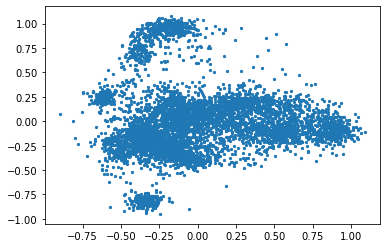

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load the embeddings from file
embeddings = pd.read_csv('politician_embedding.csv')

# apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=5)

# display the plot
plt.show()



CELF

In [35]:
%%time
import networkx as nx
array1 = Array2d_result
# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = array1[u][v]

# Run the CELF algorithm
k = 10
S3_c_emb = celf_influence_maximization(G3, k)

# Print the selected nodes
print(S3_c_emb)

[403, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Wall time: 14min 54s


In [36]:
seeds = S3_c_emb
Spread3_c_emb = independent_cascade(G3, seeds, 0.1)
Spread3_c_emb

5896

CELF++

In [37]:
%%time
import networkx as nx
array1 = Array2d_result
# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = array1[u][v]

# Run the CELF algorithm
k = 10
S3_cpp_emb = celfpp_influence_maximization(G3, k)

# Print the selected nodes
print(S3_cpp_emb)

[93, 98, 147, 395, 0, 1, 2, 3, 4, 5]
Wall time: 15min 55s


In [38]:
seeds = S3_cpp_emb
Spread3_cpp_emb = independent_cascade(G3, seeds, 0.1)
Spread3_cpp_emb

5901

CELFIE

In [39]:
%%time
import networkx as nx
array1 = Array2d_result
# Set the weights of the edges (optional)
for u, v in G3.edges():
    G3[u][v]['weight'] = array1[u][v]

# Run the CELFIE algorithm
k = 10
alpha = 0.1
S3_celfie_emb = celfie_influence_maximization(G3, k, alpha)

# Print the selected nodes
print(S3_celfie_emb)

[3873, 2097, 4686, 2975, 5126, 1782, 2604, 2337, 3340, 5193]
Wall time: 50min 48s


In [40]:
seeds31 = S3_celfie_emb
Spread3_celfie31 = independent_cascade(G3, seeds31, 0.1)
Spread3_celfie31

5884

In [41]:
seeds32 = S3_celfie_emb
Spread3_celfie32 = independent_cascade(G3, seeds32, 0.4)
Spread3_celfie32

5905

# Graph 1 Embeddings